<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/QUANT004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
!pip install ta

In [3]:
import pandas as pd

def calculate_biasvol(df, period):
    """
    计算BIASVOL，即成交量与过去一段时间平均成交量的偏差比率。
    这里简化处理，直接计算偏差而非比率。
    """
    return (df['Volume'] - df['Volume'].rolling(window=period).mean()) / df['Volume'].rolling(window=period).mean() * 100

def BIASVOL_signal(df, para=[6, 12, 24]):
    """
    根据BIASVOL的量化策略生成交易信号。
    参数para定义了BIASVOL计算时使用的周期。
    """
    # 计算不同周期的BIASVOL
    for p in para:
        df[f'BIASVOL{p}'] = calculate_biasvol(df, p)

    # 根据BIASVOL的值生成交易信号
    df['signal'] = 0  # 初始化信号为0（无信号）
    buy_conditions = (df['BIASVOL6'] > 5) & (df['BIASVOL12'] > 7) & (df['BIASVOL24'] > 11)
    sell_conditions = (df['BIASVOL6'] < -5) & (df['BIASVOL12'] < -7) & (df['BIASVOL24'] < -11)

    df.loc[buy_conditions, 'signal'] = 1  # 买入信号
    df.loc[sell_conditions, 'signal'] = -1  # 卖出信号

    return df

# 示例使用
# 假设df是一个包含'Close'和'Volume'列的DataFrame
# 这里我们创建一个模拟的DataFrame来测试函数
import numpy as np
np.random.seed(0)
dates = pd.date_range('20230101', periods=100)
df = pd.DataFrame(data=np.random.randint(100, 1000, size=(100, 2)), index=dates, columns=['Close', 'Volume'])

# 调用函数并打印结果
df = BIASVOL_signal(df)
print(df[['Close', 'Volume', 'BIASVOL6', 'BIASVOL12', 'BIASVOL24', 'signal']].tail(10))

            Close  Volume    BIASVOL6  BIASVOL12   BIASVOL24  signal
2023-04-01    980     396  -16.012725  -6.640472  -10.407240       0
2023-04-02    428     119  -72.131148 -71.873153  -72.136585      -1
2023-04-03    707     940  103.978300  94.852306  114.530240       1
2023-04-04    510     550   22.222222  10.663984   21.737527       1
2023-04-05    348     280  -36.699322 -39.892665  -34.655776      -1
2023-04-06    423     929   73.428749  78.797113  104.475422       1
2023-04-07    882     964   52.934955  74.981092  103.715770       1
2023-04-08    360     849   12.898936  44.020356   68.885205       1
2023-04-09    239     698   -1.920375  19.061834   40.090316       0
2023-04-10    561     989   26.014016  60.183561   96.669152       1


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import ta

data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [5]:
df = BIASVOL_signal(data)
print(df[['Close', 'Volume', 'BIASVOL6', 'BIASVOL12', 'BIASVOL24', 'signal']].tail(100))

                 Close     Volume   BIASVOL6  BIASVOL12  BIASVOL24  signal
Date                                                                      
2022-08-10  294.356659   94918800   4.368020   4.185701   4.003677       0
2022-08-11  286.630005   70155000 -21.430391 -23.229914 -22.001511      -1
2022-08-12  300.029999   79657200 -12.004087 -12.154598 -10.626116       0
2022-08-15  309.320007   89359200   3.240028  -1.873383   0.192446       0
2022-08-16  306.563324   88136400   4.001643  -2.576350  -0.723233       0
...                ...        ...        ...        ...        ...     ...
2022-12-23  123.150002  166989700   4.316024  17.072495  45.639745       0
2022-12-27  109.099998  208643400  21.528671  37.365316  74.622134       1
2022-12-28  112.709999  221070500  19.306827  36.824237  76.256821       1
2022-12-29  121.820000  221923300  13.406061  29.842971  70.568539       1
2022-12-30  123.180000  157777300 -20.213385  -6.866358  17.244927       0

[100 rows x 6 columns]


In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def get_stock_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        return data
    except:
        print("Invalid input! Please enter a valid stock symbol, start date, and end date.")
        return None

In [8]:
def calculate_macd(data):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal


def calculate_biasvol(df, period):
    """
    计算BIASVOL，即成交量与过去一段时间平均成交量的偏差比率。
    这里简化处理，直接计算偏差而非比率。
    """
    return (df['Volume'] - df['Volume'].rolling(window=period).mean()) / df['Volume'].rolling(window=period).mean() * 100

def BIASVOL_signal(df, para=[6, 12, 24]):
    """
    根据BIASVOL的量化策略生成交易信号。
    参数para定义了BIASVOL计算时使用的周期。
    """
    # 计算不同周期的BIASVOL
    for p in para:
        df[f'BIASVOL{p}'] = calculate_biasvol(df, p)

    # 根据BIASVOL的值生成交易信号
    df['signal'] = 0  # 初始化信号为0（无信号）
    buy_conditions = (df['BIASVOL6'] > 5) & (df['BIASVOL12'] > 7) & (df['BIASVOL24'] > 11)
    sell_conditions = (df['BIASVOL6'] < -5) & (df['BIASVOL12'] < -7) & (df['BIASVOL24'] < -11)

    df.loc[buy_conditions, 'signal'] = 1  # 买入信号
    df.loc[sell_conditions, 'signal'] = -1  # 卖出信号

    return df


In [9]:
def generate_signals(data):
    df = BIASVOL_signal(data)
    return df['signal']

def simulate_trades(data, signals, initial_money):
    num_shares = 0
    cash_balance = initial_money
    dates_bought = []
    dates_sold = []
    for i in range(len(data)):
        if signals[i] == 1 and cash_balance > 0:
            num_shares = cash_balance / data['Close'][i]
            cash_balance = 0
            dates_bought.append(data.index[i])
            print(f"Buy {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
        elif signals[i] == -1 and num_shares > 0:
            sell_price = data['Close'][i]
            cash_balance = num_shares * sell_price
            num_shares = 0
            dates_sold.append(data.index[i])
            print(f"Sell {num_shares:.2f} shares at {data['Close'][i]:.2f}, balance: ${cash_balance:.2f}")
    return cash_balance if num_shares == 0 else num_shares * data['Close'][-1], dates_bought, dates_sold

In [10]:
def plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(data['Close'], label='Price')
    ax.scatter(dates_bought, data.loc[dates_bought]['Close'], marker='^', color='green', label='Buy')
    ax.scatter(dates_sold, data.loc[dates_sold]['Close'], marker='v', color='red', label='Sell')
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.set_title(f"{symbol} Stock Price ({start_date} to {end_date})")
    plt.savefig("plot.png")


def main():
    symbol = input("Enter the stock ticker symbol: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")
    initial_money = float(input("Enter the initial amount of money: "))

    data = get_stock_data(symbol, start_date, end_date)
    if data is None:
        return

    signals = generate_signals(data)
    print(signals)
    final_balance, dates_bought, dates_sold = simulate_trades(data, signals, initial_money)

    print(f"Final balance: ${final_balance:.2f}")
    print(f"Profit/Loss: ${final_balance - initial_money:.2f}")

    plot_data(data, signals, symbol, start_date, end_date, dates_bought, dates_sold)

Enter the stock ticker symbol: TSLA
Enter the start date (YYYY-MM-DD): 2020-01-01
Enter the end date (YYYY-MM-DD): 2023-12-01
Enter the initial amount of money: 50000


[*********************100%%**********************]  1 of 1 completed


Date
2020-01-02    0
2020-01-03    0
2020-01-06    0
2020-01-07    0
2020-01-08    0
             ..
2023-11-24   -1
2023-11-27    0
2023-11-28    1
2023-11-29    0
2023-11-30    0
Name: signal, Length: 986, dtype: int64
Buy 1020.82 shares at 48.98, balance: $0.00
Sell 0.00 shares at 49.87, balance: $50909.90
Buy 1397.04 shares at 36.44, balance: $0.00
Sell 0.00 shares at 28.95, balance: $40447.95
Buy 1263.97 shares at 32.00, balance: $0.00
Sell 0.00 shares at 34.42, balance: $43500.86
Buy 1002.40 shares at 43.40, balance: $0.00
Sell 0.00 shares at 50.26, balance: $50380.01
Buy 946.10 shares at 53.25, balance: $0.00
Sell 0.00 shares at 51.27, balance: $48511.14
Buy 930.66 shares at 52.13, balance: $0.00
Sell 0.00 shares at 52.17, balance: $48554.57
Buy 766.72 shares at 63.33, balance: $0.00
Sell 0.00 shares at 66.12, balance: $50694.73
Buy 704.22 shares at 71.99, balance: $0.00
Sell 0.00 shares at 100.06, balance: $70461.17
Buy 698.53 shares at 100.87, balance: $0.00
Sell 0.00 shares a

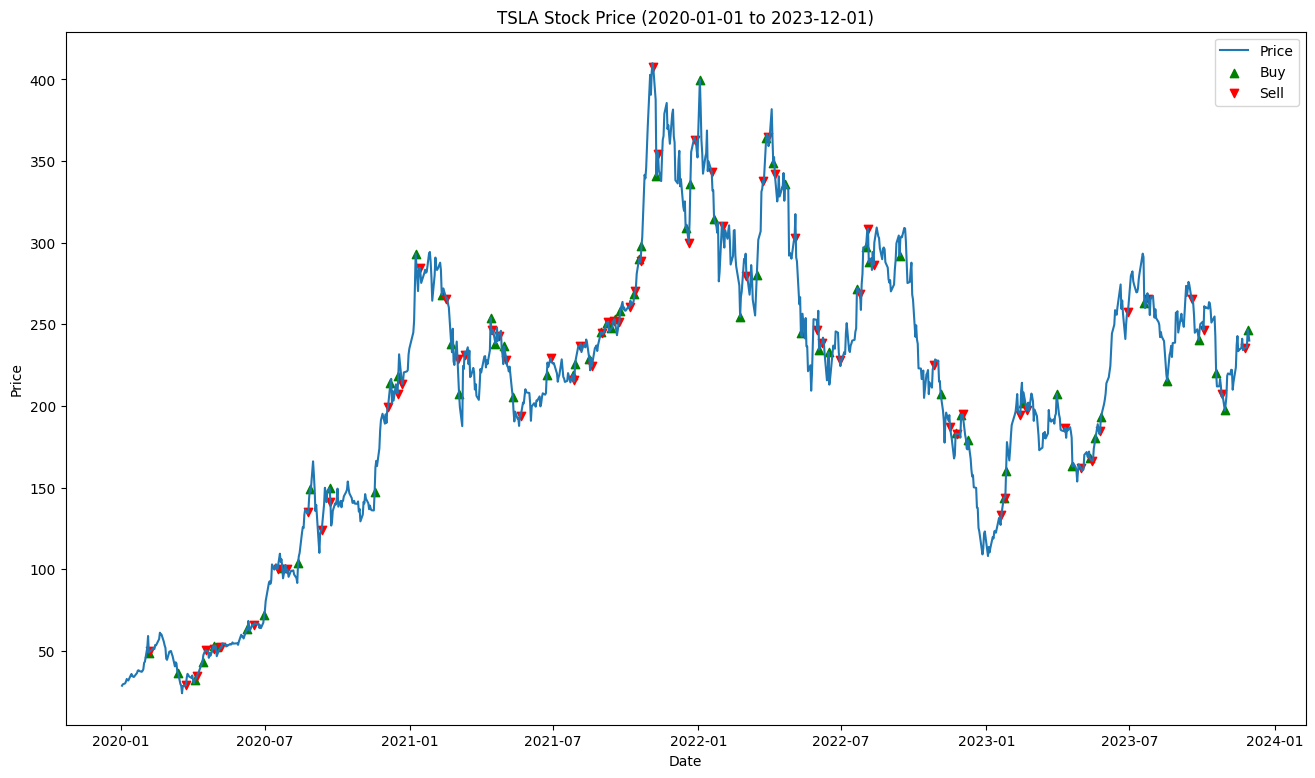

In [11]:
if __name__ == '__main__':
    main()